In [1]:
import sys
sys.path.append('../src')
sys.path.append('../data')
sys.path.append('../src/data')
from GraphSage import GraphSage
from coraloader import cora_loader
from n_GCN import n_hidden_GCN
from LPA_GCN import LPA_GCN
from arxiv_loader import arxiv_loader 

In [2]:
loader = arxiv_loader(edegs_path="../data/edges.csv", labels_path="../data/labels.csv",
                      f1_path='../data/f_1.npz', f2_path='../data/f_2.npz', f3_path='../data/f_3.npz',
                     f4_path='../data/f_4.npz', f5_path='../data/f_5.npz', f6_path='../data/f_6.npz')
A, X, y = loader.get_train()

In [5]:
model = GraphSage(A, X, y, agg_func='MAX', len_walk=3, num_neigh=10, F=128, class_num=len(set(y)))
acc_max = model.train_epoch(epochs=20, lr=1e-3)

Train length :5927, Validation length :2540
Epoch: 0
training loss 3.7297
Validtion: Average loss: 3.5714, Accuracy: 15.0394%
Epoch: 1
training loss 3.5727
Validtion: Average loss: 3.4319, Accuracy: 15.2756%
Epoch: 2
training loss 3.4389
Validtion: Average loss: 3.3117, Accuracy: 15.2362%
Epoch: 3
training loss 3.3216
Validtion: Average loss: 3.2135, Accuracy: 15.2362%
Epoch: 4
training loss 3.2296
Validtion: Average loss: 3.1362, Accuracy: 15.2362%
Epoch: 5
training loss 3.1584
Validtion: Average loss: 3.0827, Accuracy: 15.2362%
Epoch: 6
training loss 3.1125
Validtion: Average loss: 3.0468, Accuracy: 15.4331%
Epoch: 7
training loss 3.0819
Validtion: Average loss: 3.0165, Accuracy: 17.5197%
Epoch: 8
training loss 3.0614
Validtion: Average loss: 2.9966, Accuracy: 22.8740%
Epoch: 9
training loss 3.0468
Validtion: Average loss: 2.9764, Accuracy: 23.8976%
Epoch: 10
training loss 3.0349
Validtion: Average loss: 2.9626, Accuracy: 20.5118%
Epoch: 11
training loss 3.0252
Validtion: Average los

In [6]:
model = GraphSage(A, X, y, agg_func='MEAN', len_walk=3, num_neigh=10, F=128, class_num=len(set(y)))
acc_mean = model.train_epoch(epochs=20, lr=1e-3)

Train length :5927, Validation length :2540
Epoch: 0
training loss 3.7372
Validtion: Average loss: 3.6433, Accuracy: 0.9055%
Epoch: 1
training loss 3.6444
Validtion: Average loss: 3.5579, Accuracy: 11.3386%
Epoch: 2
training loss 3.5610
Validtion: Average loss: 3.4764, Accuracy: 16.6142%
Epoch: 3
training loss 3.4807
Validtion: Average loss: 3.3971, Accuracy: 15.6693%
Epoch: 4
training loss 3.4012
Validtion: Average loss: 3.3184, Accuracy: 15.5512%
Epoch: 5
training loss 3.3236
Validtion: Average loss: 3.2427, Accuracy: 15.4724%
Epoch: 6
training loss 3.2481
Validtion: Average loss: 3.1711, Accuracy: 15.5512%
Epoch: 7
training loss 3.1776
Validtion: Average loss: 3.1081, Accuracy: 15.6299%
Epoch: 8
training loss 3.1167
Validtion: Average loss: 3.0561, Accuracy: 15.9843%
Epoch: 9
training loss 3.0670
Validtion: Average loss: 3.0193, Accuracy: 16.6535%
Epoch: 10
training loss 3.0305
Validtion: Average loss: 2.9970, Accuracy: 17.2047%
Epoch: 11
training loss 3.0098
Validtion: Average loss

In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy on 0.05 arxiv with GraphSage Max pooling')

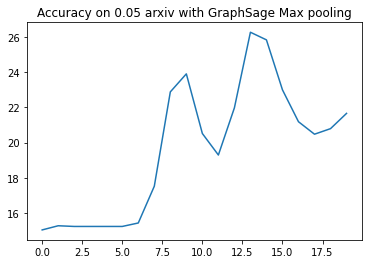

In [10]:
plt.plot(range(20), acc_max['acc'])
plt.title('Accuracy on 0.05 arxiv with GraphSage Max pooling')

Text(0.5, 1.0, 'Accuracy on 0.05 arxiv with GraphSage Mean pooling')

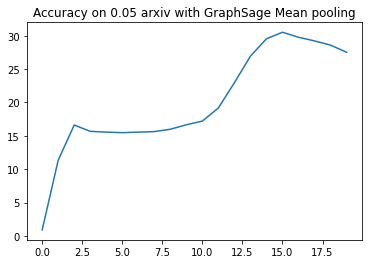

In [11]:
plt.plot(range(20), acc_mean['acc'])
plt.title('Accuracy on 0.05 arxiv with GraphSage Mean pooling')

Train length :1896, Validation length :812
Epoch: 0
training loss 8.8609
Validtion: Average loss: 3.1130, Accuracy: 39.2857%
Epoch: 1
training loss 9.8456
Validtion: Average loss: 2.5422, Accuracy: 48.8916%
Epoch: 2
training loss 9.2954
Validtion: Average loss: 1.5407, Accuracy: 59.8522%
Epoch: 3
training loss 8.2205
Validtion: Average loss: 0.7203, Accuracy: 81.0345%
Epoch: 4
training loss 7.3502
Validtion: Average loss: 0.6417, Accuracy: 79.6798%
Epoch: 5
training loss 7.2313
Validtion: Average loss: 0.7975, Accuracy: 76.4778%
Epoch: 6
training loss 7.3107
Validtion: Average loss: 0.7188, Accuracy: 78.8177%
Epoch: 7
training loss 7.1705
Validtion: Average loss: 0.5654, Accuracy: 83.7438%
Epoch: 8
training loss 6.9816
Validtion: Average loss: 0.4789, Accuracy: 86.5764%
Epoch: 9
training loss 6.8607
Validtion: Average loss: 0.4682, Accuracy: 87.9310%
Epoch: 10
training loss 6.8112
Validtion: Average loss: 0.4871, Accuracy: 87.5616%
Epoch: 11
training loss 6.7884
Validtion: Average loss

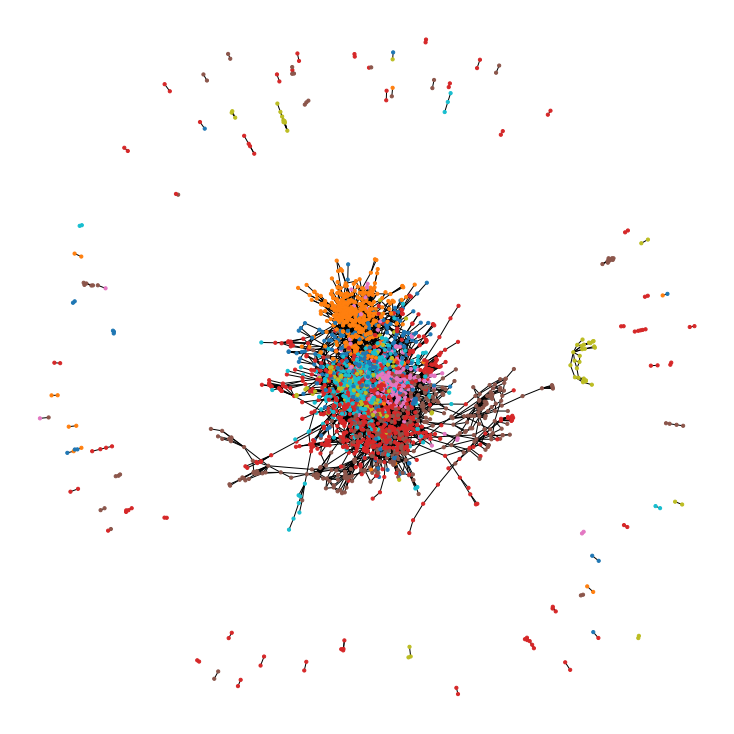

In [13]:
cora = cora_loader('cora.content',  'cora.cites')
X, y, A = cora.get_train()
model = LPA_GCN(A, X, y, lamb=5, hid=200)
acc = model.train_model(epochs=50, lr=4e-2)
model.draw_cora()